In [1]:
import argparse
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import tensorflow.lite as tflite
from tensorflow import keras
import zlib
from platform import python_version
import tensorflow_model_optimization as tfmot   
import tempfile
import time
print(f"Python version used to excute the code is {python_version()}")
import warnings
warnings.filterwarnings('ignore')



Python version used to excute the code is 3.7.9


In [2]:
from classes import read_audios
from classes import SignalGenerator
from classes import make_models
from classes import model_analysis
from classes import latency


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
epochs = 20
mymodel = "model_"
TFLITE =  f'{mymodel}.tflite'     # path for saving the best model after converted to TF.lite model 
units = 8                         # The number of output class [8:without silence , 9 : with silence]
################## Fix the Random seed to reproduce the same results 
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [4]:
# zip_path = tf.keras.utils.get_file(
#     origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
#     fname='mini_speech_commands.zip',
#     extract=True,
#     cache_dir='.', cache_subdir='data')

# data_dir = os.path.join('.', 'data', 'mini_speech_commands')
reading_class = read_audios()
train_files, val_files, test_files = reading_class.read()

In [5]:
def generate_params(alpha,frame_length,frame_step):
    alpha = [0.59]
    mfcc = [True]
    m = ['ds_cnn']
    number_of_bins = [16]
    lower_freq = [20]
    upper_freq = [4000]
    sample_rate = [16000]
    frame_length = [1000]
    frame_step = [350]

    # alpha = [0.3]
    # mfcc = [True]
    # m = ['cnn']
    # number_of_bins = [16]
    # lower_freq = [20]
    # upper_freq = [4000]
    # sample_rate = [16000]
    # frame_length = [1000]
    # frame_step = [100]
    df = pd.DataFrame(columns=['alpha', 'mfcc', 'model', 'number_of_bins', 'lower_freq', 'upper_freq','sample_rate','frame_step', 'frame_length','n_acuracy','n_size','n_latency','q_acuracy','q_size','q_latency'])
    for p_alpha in range(len(alpha)):
        for p_mfcc in range(len(mfcc)):
            for p_m in range(len(m)):
                for p_bins in range(len(number_of_bins)):
                    for p_lower_f in range(len(lower_freq)):
                        for p_upper_f in range(len(upper_freq)):
                            for p_rate in range(len(sample_rate)):
                                for p_f_step in range(len(frame_step)):
                                    for p_f_length in range(len(frame_length)):
                                        if((lower_freq[p_lower_f] < upper_freq[p_upper_f]) and (upper_freq[p_lower_f] <= sample_rate[p_upper_f]/2) and (frame_step[p_f_step] < frame_length[p_f_length])):
                                            data = [[alpha[p_alpha],mfcc[p_mfcc],m[p_m],number_of_bins[p_bins],lower_freq[p_lower_f],upper_freq[p_upper_f],sample_rate[p_rate],frame_step[p_f_step],frame_length[p_f_length],0,0,0,0,0,0]]
                                            d = pd.DataFrame(data, columns=['alpha', 'mfcc', 'model', 'number_of_bins', 'lower_freq', 'upper_freq','sample_rate','frame_step', 'frame_length','n_acuracy','n_size','n_latency','q_acuracy','q_size','q_latency'])
                                            df = df.append(d, ignore_index = True)
    return df

configuration  0 from  1!!!!!!!!!!!!
time estimate is:    0.0 minutes left

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.77500, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00002: val_sparse_categorical_accuracy improved from 0.77500 to 0.82250, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00003: val_sparse_categorical_accuracy improved from 0.82250 to 0.88375, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00004: val_sparse_categorical_accuracy improved from 0.88375 to 0.88750, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00005: val_sparse_categorical_accuracy improved from 0.88750 to 0.90875, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00006: val_sparse_categorical_accuracy did not improve from 0.90875

Epoch 00007: val_sparse_categorical_accuracy did not improve from 0.90875

Epoch 00008: val_sparse_categorical_accuracy improved from 0.90875 to 0.91875, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00009: val_sparse_categorical_accuracy did not improve from 0.91875

Epoch 00010: val_sparse_categorical_accuracy did not improve from 0.91875

Epoch 00011: val_sparse_categorical_accuracy did not improve from 0.91875

Epoch 00012: val_sparse_categorical_accuracy did not improve from 0.91875

Epoch 00013: val_sparse_categorical_accuracy did not improve from 0.91875

Epoch 00014: val_sparse_categorical_accuracy did not improve from 0.91875

Epoch 00015: val_sparse_categorical_accuracy improved from 0.91875 to 0.92250, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00016: val_sparse_categorical_accuracy improved from 0.92250 to 0.92875, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00017: val_sparse_categorical_accuracy did not improve from 0.92875

Epoch 00018: val_sparse_categorical_accuracy improved from 0.92875 to 0.93125, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00019: val_sparse_categorical_accuracy did not improve from 0.93125

Epoch 00020: val_sparse_categorical_accuracy did not improve from 0.93125
25/25 [==============================] - 1s 22ms/step - loss: 0.2288 - sparse_categorical_accuracy: 0.9275


normal done  $$$$$$$$$$$$$$$$$$$$$$$


the model is saved successfuly to ./models/PQT_V_0.tflite
quantized done  $$$$$$$$$$$$$$$$$$$$$$$
configuration  0 from  1!!!!!!!!!!!!
time estimate is:    0.0 minutes left

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.74875, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00002: val_sparse_categorical_accuracy improved from 0.74875 to 0.84000, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00003: val_sparse_categorical_accuracy improved from 0.84000 to 0.87875, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00004: val_sparse_categorical_accuracy improved from 0.87875 to 0.89375, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00005: val_sparse_categorical_accuracy improved from 0.89375 to 0.90250, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00006: val_sparse_categorical_accuracy improved from 0.90250 to 0.91375, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00007: val_sparse_categorical_accuracy did not improve from 0.91375

Epoch 00008: val_sparse_categorical_accuracy did not improve from 0.91375

Epoch 00009: val_sparse_categorical_accuracy did not improve from 0.91375

Epoch 00010: val_sparse_categorical_accuracy did not improve from 0.91375

Epoch 00011: val_sparse_categorical_accuracy did not improve from 0.91375

Epoch 00012: val_sparse_categorical_accuracy improved from 0.91375 to 0.92500, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00013: val_sparse_categorical_accuracy did not improve from 0.92500

Epoch 00014: val_sparse_categorical_accuracy did not improve from 0.92500

Epoch 00015: val_sparse_categorical_accuracy did not improve from 0.92500

Epoch 00016: val_sparse_categorical_accuracy improved from 0.92500 to 0.92750, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00017: val_sparse_categorical_accuracy did not improve from 0.92750

Epoch 00018: val_sparse_categorical_accuracy did not improve from 0.92750

Epoch 00019: val_sparse_categorical_accuracy did not improve from 0.92750

Epoch 00020: val_sparse_categorical_accuracy did not improve from 0.92750
25/25 [==============================] - 1s 24ms/step - loss: 0.2064 - sparse_categorical_accuracy: 0.9312


normal done  $$$$$$$$$$$$$$$$$$$$$$$


the model is saved successfuly to ./models/PQT_V_0.tflite
quantized done  $$$$$$$$$$$$$$$$$$$$$$$
configuration  0 from  1!!!!!!!!!!!!
time estimate is:    0.0 minutes left

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.76375, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00002: val_sparse_categorical_accuracy improved from 0.76375 to 0.85125, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00003: val_sparse_categorical_accuracy improved from 0.85125 to 0.88750, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00004: val_sparse_categorical_accuracy did not improve from 0.88750

Epoch 00005: val_sparse_categorical_accuracy improved from 0.88750 to 0.92000, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00006: val_sparse_categorical_accuracy did not improve from 0.92000

Epoch 00007: val_sparse_categorical_accuracy did not improve from 0.92000

Epoch 00008: val_sparse_categorical_accuracy did not improve from 0.92000

Epoch 00009: val_sparse_categorical_accuracy did not improve from 0.92000

Epoch 00010: val_sparse_categorical_accuracy did not improve from 0.92000

Epoch 00011: val_sparse_categorical_accuracy did not improve from 0.92000

Epoch 00012: val_sparse_categorical_accuracy improved from 0.92000 to 0.92875, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00013: val_sparse_categorical_accuracy did not improve from 0.92875

Epoch 00014: val_sparse_categorical_accuracy did not improve from 0.92875

Epoch 00015: val_sparse_categorical_accuracy did not improve from 0.92875

Epoch 00016: val_sparse_categorical_accuracy did not improve from 0.92875

Epoch 00017: val_sparse_categorical_accuracy improved from 0.92875 to 0.93375, saving model to ./checkpoints/mfcc/chkp_best_V_0


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets


INFO:tensorflow:Assets written to: ./checkpoints/mfcc/chkp_best_V_0/assets



Epoch 00018: val_sparse_categorical_accuracy did not improve from 0.93375

Epoch 00019: val_sparse_categorical_accuracy did not improve from 0.93375

Epoch 00020: val_sparse_categorical_accuracy did not improve from 0.93375


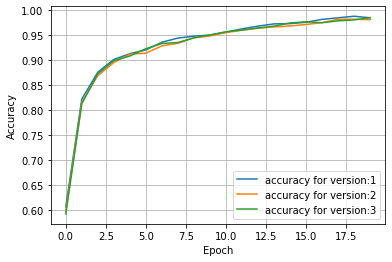

25/25 [==============================] - 1s 24ms/step - loss: 0.2261 - sparse_categorical_accuracy: 0.9275


normal done  $$$$$$$$$$$$$$$$$$$$$$$


the model is saved successfuly to ./models/PQT_V_0.tflite
quantized done  $$$$$$$$$$$$$$$$$$$$$$$


In [6]:
for j in range(1,4):
    if j==1:
        df = generate_params(0.59,1000,350)
    if j==2:
        df = generate_params(0.6,1024,256)
    if j==3:
        df = generate_params(0.3,1024,256)        
        
    LABELS = np.array(['stop', 'up', 'yes', 'right', 'left', 'no',  'down', 'go'] , dtype = str) 
    start = 0
    end = 0
    for i in range(df.shape[0]):
        print("configuration  " + str(i) + " from  " + str(df.shape[0])+ "!!!!!!!!!!!!")
        print("time estimate is:    " + str((end - start)/60 *(df.shape[0] - i)) + " minutes left")
        start = time.time()

        mymodel = "V_" + str(i)
        TFLITE =  f'{mymodel}.tflite' 
        
        STFT_OPTIONS = {'frame_length': df['frame_length'][i], 'frame_step': df['frame_step'][i], 'mfcc': False}
        MFCC_OPTIONS = { 'sampling_rate': df['sample_rate'][i],'frame_length': df['frame_length'][i], 'frame_step': df['frame_step'][i], 'mfcc': True,
                'lower_frequency': df['lower_freq'][i], 'upper_frequency': df['upper_freq'][i], 'num_mel_bins': df['number_of_bins'][i],
                'num_coefficients': 10}
        if df.loc[i]['mfcc'] is True:
            options = MFCC_OPTIONS
            strides = [2, 1]
        else:
            options = STFT_OPTIONS
            strides = [2, 2]

        generator = SignalGenerator(LABELS, **options)
        train_ds = generator.make_dataset(train_files, True)
        val_ds = generator.make_dataset(val_files, False)
        test_ds = generator.make_dataset(test_files, False)

        model_maker = make_models()
        ############ Applying Structured-Based Pruning
        model, model_checkpoint_callback, checkpoint_filepath = model_maker.models(df['alpha'][i], strides, units, df['mfcc'][i], mymodel,False,train_ds)
        ############ Applying Magnitude-Based Pruning
        #model, model_checkpoint_callback, checkpoint_filepath = model_maker.models(1, strides, units, model_version, mfcc, mymodel)
        history = model.fit(train_ds, epochs=epochs,   validation_data=val_ds,callbacks=[model_checkpoint_callback ], verbose=0)
        model_maker.plot_loss(history, mymodel,j)
        analysis = model_analysis(test_ds, checkpoint_filepath, train_ds)
        Compressed , tflite_model_dir = analysis.S_pruning_Model_evaluate_and_compress_to_TFlite( tflite_model_dir = TFLITE)
        acc, size = analysis.load_and_evaluation(tflite_model_dir, Compressed)
        laten = latency()
        inf, tot = laten.calculate(model = tflite_model_dir, mfcc = df['mfcc'][i] ,rate = df['sample_rate'][i], length = df['frame_length'][i], stride = df['frame_step'][i],lower_frequency = df['lower_freq'][i], upper_frequency = df['upper_freq'][i], num_mel_bins = df['number_of_bins'][i])
        df['n_acuracy'][i] = acc
        df['n_size'][i] = size
        df['n_latency'][i] = tot
        print("normal done  $$$$$$$$$$$$$$$$$$$$$$$")
        #quantized:
        Compressed , Quantized   = analysis.apply_Quantization(TFLITE, PQT=True , WAPQT = False)
        acc, size = analysis.load_and_evaluation(Quantized , Compressed)
        inf, tot = laten.calculate(model = Quantized, mfcc = df['mfcc'][i] ,rate = df['sample_rate'][i], length = df['frame_length'][i], stride = df['frame_step'][i],lower_frequency = df['lower_freq'][i], upper_frequency = df['upper_freq'][i], num_mel_bins = df['number_of_bins'][i])
        df['q_acuracy'][i] = acc
        df['q_size'][i] = size
        df['q_latency'][i] = tot
        print("quantized done  $$$$$$$$$$$$$$$$$$$$$$$")
        end = time.time()

In [88]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.59,True,ds_cnn,16,20,4000,16000,350,700,92.125,192.869,43.8714,91.875,48.937,46.5995
1,0.59,True,ds_cnn,16,20,4000,16000,350,800,92.375,192.84,39.5207,92.125,49.142,39.8986
2,0.59,True,ds_cnn,16,20,4000,16000,350,900,92.75,192.786,39.4545,93.125,48.554,41.3001
3,0.59,True,ds_cnn,16,20,4000,16000,350,1000,93.125,192.84,38.8049,93.125,48.973,39.4703
4,0.59,True,ds_cnn,16,20,4000,16000,350,1100,92.5,192.794,69.0237,92.125,48.932,70.4633
5,0.59,True,ds_cnn,16,20,4000,16000,400,700,92,192.712,36.2532,91.375,49.675,36.3651
6,0.59,True,ds_cnn,16,20,4000,16000,400,800,92.625,192.761,35.707,92,48.232,38.3297
7,0.59,True,ds_cnn,16,20,4000,16000,400,900,90.25,192.721,35.942,90.25,48.621,35.2807
8,0.59,True,ds_cnn,16,20,4000,16000,400,1000,92.125,192.731,39.8167,91.875,48.778,40.7359
9,0.59,True,ds_cnn,16,20,4000,16000,400,1100,91.25,192.635,67.3234,90.875,48.627,69.4734


In [69]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.59,True,ds_cnn,16,20,4000,16000,500,1000,90.625,192.746,30.7249,90.75,48.718,31.1254


In [65]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.59,True,ds_cnn,16,20,4000,16000,550,1000,90.625,192.96,29.3558,90.75,49.081,29.0381


In [61]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.59,True,ds_cnn,16,20,4000,16000,450,900,92.5,192.716,32.4761,92.25,49.418,33.13


In [57]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.59,True,ds_cnn,14,20,4000,16000,450,900,90.625,192.487,33.1481,90.25,49.586,34.3399


In [49]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.59,True,ds_cnn,14,20,4000,16000,400,800,92.375,192.786,36.6524,92.125,48.062,37.51


In [45]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.59,True,ds_cnn,14,20,4000,16000,350,700,92.25,192.829,38.8391,92,49.15,39.487


In [41]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.59,True,ds_cnn,14,20,4000,16000,320,640,92.625,192.728,42.5334,92.375,48.151,43.0427


In [37]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.5,True,ds_cnn,14,20,4000,16000,320,640,93.5,142.089,42.3881,92.875,36.794,42.1869


In [33]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.6,True,ds_cnn,14,20,4000,16000,320,640,91.375,197.687,42.6595,91.75,50.068,43.2724


In [29]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.25,True,ds_cnn,14,20,4000,16000,320,640,91.125,41.531,41.9416,90.875,18.802,42.199


In [25]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.25,True,ds_cnn,14,20,4000,16000,750,1000,87.875,41.49,24.2553,87.625,18.722,24.613


In [21]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.3,True,ds_cnn,14,20,4000,16000,750,1000,87.5,55.666,24.7466,87.25,23.504,24.3365


In [15]:
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,n_size,n_latency,q_acuracy,q_size,q_latency
0,0.35,True,ds_cnn,14,20,4000,16000,750,1000,87.25,73.449,24.7873,86.75,29.514,24.8037


In [87]:
df.to_csv('final_grid.csv')

In [30]:
grid = pd.read_csv('grid_search_result.csv').drop(columns = ['Unnamed: 0'])
df = pd.DataFrame( columns=['alpha', 'mfcc', 'model', 'number_of_bins', 'lower_freq', 'upper_freq','sample_rate','frame_step', 'frame_length','n_acuracy','n_size','n_latency','q_acuracy','q_size','q_latency','qwa_acuracy','qwa_size','qwa_latency','m_acuracy','m_size','m_latency'])
df = df.append(grid.loc[grid['size'] <= 500].loc[grid['acuracy'] >= 92].sort_values(by = ['acuracy'], ascending = False).reset_index()).drop(['index'], axis=1)
df['n_acuracy'] = df['acuracy']
df['n_size'] = df['size']
df['n_latency'] = df['latency']
df = df.drop(columns = ['acuracy', 'size', 'latency'])
df

,alpha,mfcc,model,number_of_bins,lower_freq,upper_freq,sample_rate,frame_step,frame_length,n_acuracy,...,n_latency,q_acuracy,q_size,q_latency,qwa_acuracy,qwa_size,qwa_latency,m_acuracy,m_size,m_latency
0,0.6,True,cnn,40,20,4000,16000,320,1020,94.000,...,43.244722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.6,True,cnn,40,20,4000,16000,320,640,93.875,...,44.951603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.6,True,ds_cnn,16,20,4000,16000,320,1020,93.875,...,40.674331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.6,True,ds_cnn,16,20,4000,16000,320,640,93.875,...,42.707617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.6,True,ds_cnn,16,20,4000,16000,320,840,93.500,...,42.175066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.6,True,ds_cnn,16,20,4000,16000,128,1020,93.250,...,86.764703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.3,True,cnn,16,20,4000,16000,320,1020,93.250,...,41.077759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.3,True,ds_cnn,16,20,4000,16000,320,840,93.125,...,41.270542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.6,True,cnn,40,20,4000,16000,128,840,93.125,...,92.651932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.6,True,ds_cnn,40,20,4000,16000,320,840,93.000,...,43.749540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
LABELS = np.array(['stop', 'up', 'yes', 'right', 'left', 'no',  'down', 'go'] , dtype = str) 

for i in range(df.shape[0]):
    print("configuration  " + str(i) + " from  " + str(df.shape[0])+ "!!!!!!!!!!!!")
    model_version = f"_V_{version}_alpha={df.loc[i]['alpha']}"
    mymodel = df.loc[i]['model'] + model_version
    TFLITE =  f'{mymodel}.tflite' 

    STFT_OPTIONS = {'frame_length': df['frame_length'][i], 'frame_step': df['frame_step'][i], 'mfcc': False}
    MFCC_OPTIONS = { 'sampling_rate': df['sample_rate'][i],'frame_length': df['frame_length'][i], 'frame_step': df['frame_step'][i], 'mfcc': True,
            'lower_frequency': df['lower_freq'][i], 'upper_frequency': df['upper_freq'][i], 'num_mel_bins': df['number_of_bins'][i],
            'num_coefficients': 10}
    if df.loc[i]['mfcc'] is True:
        options = MFCC_OPTIONS
        strides = [2, 1]
    else:
        options = STFT_OPTIONS
        strides = [2, 2]

    generator = SignalGenerator(LABELS, **options)
    train_ds = generator.make_dataset(train_files, True)
    val_ds = generator.make_dataset(val_files, False)
    test_ds = generator.make_dataset(test_files, False)

    model_maker = make_models()
    ############ Applying Structured-Based Pruning
    model, model_checkpoint_callback, checkpoint_filepath = model_maker.models(df['alpha'][i], strides, units, model_version, df['mfcc'][i], mymodel,False,train_ds)
    ############ Applying Magnitude-Based Pruning
    #model, model_checkpoint_callback, checkpoint_filepath = model_maker.models(1, strides, units, model_version, mfcc, mymodel)
    history = model.fit(train_ds, epochs=epochs,   validation_data=val_ds,callbacks=[model_checkpoint_callback ], verbose=0)
    model_maker.plot_loss(history, mymodel)
    analysis = model_analysis(test_ds, checkpoint_filepath, train_ds)
    Compressed , tflite_model_dir = analysis.S_pruning_Model_evaluate_and_compress_to_TFlite( tflite_model_dir = TFLITE)
    acc, size = analysis.load_and_evaluation(tflite_model_dir, Compressed)
    laten = latency()
    inf, tot = laten.calculate(model = tflite_model_dir, mfcc = df['mfcc'][i] ,rate = df['sample_rate'][i], length = df['frame_length'][i], stride = df['frame_step'][i],lower_frequency = df['lower_freq'][i], upper_frequency = df['upper_freq'][i], num_mel_bins = df['number_of_bins'][i])
    df['n_acuracy'][i] = acc
    df['n_size'][i] = size
    df['n_latency'][i] = tot
    print("normal done  $$$$$$$$$$$$$$$$$$$$$$$")
    #quantized:
    Compressed , Quantized   = analysis.apply_Quantization(TFLITE, PQT=True , WAPQT = False)
    acc, size = analysis.load_and_evaluation(Quantized , Compressed)
    inf, tot = laten.calculate(model = Quantized, mfcc = df['mfcc'][i] ,rate = df['sample_rate'][i], length = df['frame_length'][i], stride = df['frame_step'][i],lower_frequency = df['lower_freq'][i], upper_frequency = df['upper_freq'][i], num_mel_bins = df['number_of_bins'][i])
    df['q_acuracy'][i] = acc
    df['q_size'][i] = size
    df['q_latency'][i] = tot
    print("quantized done  $$$$$$$$$$$$$$$$$$$$$$$")
    #WA_quantized:
    WA_Compressed , WA_Quantized   = analysis.apply_Quantization(TFLITE, PQT=False ,WAPQT=True)
    acc, size = analysis.load_and_evaluation(WA_Quantized , WA_Compressed)
    inf, tot = laten.calculate(model = Quantized, mfcc = df['mfcc'][i] ,rate = df['sample_rate'][i], length = df['frame_length'][i], stride = df['frame_step'][i],lower_frequency = df['lower_freq'][i], upper_frequency = df['upper_freq'][i], num_mel_bins = df['number_of_bins'][i])
    df['qwa_acuracy'][i] = acc
    df['qwa_size'][i] = size
    df['qwa_latency'][i] = tot
    print("qWA done  $$$$$$$$$$$$$$$$$$$$$$$")
    #magnitute:
    model, model_checkpoint_callback, checkpoint_filepath = model_maker.models(1, strides, units, model_version, mfcc, mymodel)
    history = model.fit(train_ds, epochs=epochs,   validation_data=val_ds,callbacks=[model_checkpoint_callback ], verbose=0)
    analysis = model_analysis(test_ds, checkpoint_filepath, train_ds)
    Compressed , tflite_model_dir = analysis.S_pruning_Model_evaluate_and_compress_to_TFlite( tflite_model_dir = TFLITE)
    acc, size = analysis.load_and_evaluation(tflite_model_dir, Compressed)
    laten = latency()
    inf, tot = laten.calculate(model = tflite_model_dir, mfcc = df['mfcc'][i] ,rate = df['sample_rate'][i], length = df['frame_length'][i], stride = df['frame_step'][i],lower_frequency = df['lower_freq'][i], upper_frequency = df['upper_freq'][i], num_mel_bins = df['number_of_bins'][i])
    df['m_acuracy'][i] = acc
    df['m_size'][i] = size
    df['m_latency'][i] = tot
    print("magnitute done  $$$$$$$$$$$$$$$$$$$$$$$")

In [6]:
df.to_csv('complete_data.csv')

NameError: name 'df' is not defined

In [25]:
df = pd.read_csv('complete_data.csv')
df_q = df.loc[df['q_acuracy'] > 91.5]
df_qwa = df.loc[df['qwa_acuracy'] > 91.5]
df_q = df_q.reset_index().drop(['Unnamed: 0', 'index'], axis=1).sort_values(by=['q_latency']).head(5)
df_qwa.reset_index().drop(['Unnamed: 0', 'index'], axis=1).sort_values(by=['qwa_latency']).head(5)
df_q.to_csv('quantization.csv')
df_qwa.to_csv('quantization_WA.csv')

In [15]:
Compressed , Quantized   = analysis.apply_Quantization(TFLITE, PQT=True , WAPQT = False)

the model is saved successfuly to ./models/PQT_cnn_V_a_alpha=0.3.tflite


In [16]:
analysis.load_and_evaluation(Quantized , Compressed)

************************************************** 
 The Size of TF lite model  Before compression is = 33.008 kb
************************************************** 
 The Size of TF lite model  After compression is = 27.86 kb
************************************************** 
 The accuracy of TF lite model is = 64.38 


(64.375, 27.86)

In [17]:
WA_Compressed , WA_Quantized   = analysis.apply_Quantization(TFLITE, PQT=False ,WAPQT=True)

the model is saved successfuly to ./models/WAPQT_cnn_V_a_alpha=0.3.tflite


In [18]:
analysis.load_and_evaluation(WA_Quantized , WA_Compressed)

************************************************** 
 The Size of TF lite model  Before compression is = 35.552 kb
************************************************** 
 The Size of TF lite model  After compression is = 29.745 kb
************************************************** 
 The accuracy of TF lite model is = 62.62 


(62.625, 29.745)